<a href="https://colab.research.google.com/github/srikanth2102/BREAST_CANCER/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BREAST CANCER PREDICTION**

In [110]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [111]:
#uploading the file in the device to google colab
from google.colab import files
uploaded = files.upload()

In [112]:
#Reading File using Pandas
cancer =pd.read_csv("Breast_cancer_data.csv")
print(cancer.shape)
cancer.head()

(569, 6)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [113]:
cancer.drop(['mean_perimeter','mean_area'],axis=1,inplace=True)
print(cancer.shape)
cancer.head()

(569, 4)


,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0


In [114]:
#spliting cancer data into features and labels
target=cancer['diagnosis']
cancer.drop(['diagnosis'], axis=1, inplace=True)
target.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [122]:
#spliting test data into test and validation
from sklearn.model_selection import train_test_split

train_x, dummy_x, train_y, dummy_y  = train_test_split(cancer , target, test_size=0.3,random_state=42)

test_x, val_x, test_y, val_y = train_test_split(dummy_x, dummy_y, test_size=0.5, random_state=42)

print(train_y.head())

149    1
124    1
421    1
195    1
545    1
Name: diagnosis, dtype: int64


In [277]:
#creating a dictionary to store F1 score
models=dict()

**LOGISTIC REGRESSION**

In [137]:
#importing logistic regression and metrices
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#model fitting
log_reg=LogisticRegression(C=1000)
log_reg.fit(train_x, train_y)

#predicting validation set
pred_log_reg = log_reg.predict(val_x)
temp = log_reg.predict(train_x) 

#accuracy on validation set
print("accuray on validation set",accuracy_score(val_y,pred_log_reg),"\n")

#precision on validation set
print("precision on validation set",precision_score(val_y,pred_log_reg),"\n")

#recall on validation set
print("recall on validation set",recall_score(val_y,pred_log_reg),"\n")

#F1 score on validation set
print("F1 score of validation set",f1_score(val_y,pred_log_reg),"\n")

accuray on validation set 0.9767441860465116 

precision on validation set 1.0 

recall on validation set 0.9666666666666667 

F1 score of validation set 0.983050847457627 



In [279]:
models['log_reg']=f1_score(val_y,pred_log_reg)

**SUPPORT VECTOR MACHINE**

In [155]:
#Imprting SVC(support vector machine for classification)
from sklearn.svm import SVC

#model fitting
svm=SVC(kernel='rbf', C=1, gamma=.01)
print(svm)
svm.fit(train_x,train_y)

#prediction on validation set
pred_svm=svm.predict(val_x)
temp=svm.predict(train_x)

#accuracy on validation set
print("accuray on validation set",accuracy_score(val_y,pred_svm),"\n")

#precision on validation set
print("precision on validation set",precision_score(val_y,pred_svm),"\n")

#recall on validation set
print("recall on validation set",recall_score(val_y,pred_svm),"\n")
#F1 score on validation set
print("F1 score of validation set",f1_score(val_y,pred_svm),"\n")

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
accuray on validation set 0.9186046511627907 

precision on validation set 0.9344262295081968 

recall on validation set 0.95 

F1 score of validation set 0.9421487603305784 



In [291]:
models['svm']=f1_score(val_y,pred_svm)

**DECISION TREE**

In [189]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#model fitting
tree=DecisionTreeClassifier(max_depth=15, max_leaf_nodes=10)
tree.fit(train_x,train_y)

#prediction on validation set
pred_tree=tree.predict(val_x)

#accuracy on validation set
print("accuray on validation set",accuracy_score(val_y,pred_tree),"\n")

#precision on validation set
print("precision on validation set",precision_score(val_y,pred_tree),"\n")

#recall on validation set
print("recall on validation set",recall_score(val_y,pred_tree),"\n")

#F1 score on validation set
print("F1 score of validation set",f1_score(val_y,pred_tree),"\n")

accuray on validation set 0.9651162790697675 

precision on validation set 0.9672131147540983 

recall on validation set 0.9833333333333333 

F1 score of validation set 0.9752066115702478 



In [288]:
models['tree']=f1_score(val_y,pred_tree)

**RANDOM FOREST**

In [213]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

#model fitting
forest=RandomForestClassifier(max_features='sqrt', n_estimators=1000)
forest.fit(train_x,train_y)

#prediction on validation set
pred_forest=forest.predict(val_x)
temp=forest.predict(train_x)

#accuracy on validation set
print("accuray on validation set",accuracy_score(val_y,pred_forest),"\n")

#precision on validation set
print("precision on validation set",precision_score(val_y,pred_svm),"\n")

#recall on validation set
print("recall on validation set",recall_score(val_y,pred_svm),"\n")

#F1 score on validation set
print("F1 score of validation set",f1_score(val_y,pred_forest),"\n")

accuray on validation set 0.9534883720930233 

precision on validation set 0.9344262295081968 

recall on validation set 0.95 

F1 score of validation set 0.9666666666666667 



In [287]:
models['forest']=f1_score(val_y,pred_forest)

**BOOSTING (DECISION TREE)**

In [238]:
#importing boosting using decison tree classifier
from sklearn.ensemble import GradientBoostingClassifier

#model fitting
boosting=GradientBoostingClassifier(max_features='sqrt',max_depth=5,n_estimators=3000,learning_rate=0.1)
boosting.fit(train_x,train_y)

#prediction on validation set
pred_boosting=boosting.predict(val_x)

#accuracy on validation set
print("accuray on validation set",accuracy_score(val_y,pred_boosting),"\n")

#precision on validation set
print("precision on validation set",precision_score(val_y,pred_boosting),"\n")


#recall on validation set
print("recall on validation set",recall_score(val_y,pred_boosting),"\n")

#F1 score on validation set 
print("F1 score of validation set",f1_score(val_y,pred_boosting),"\n")

accuray on validation set 0.9651162790697675 

precision on validation set 0.9830508474576272 

recall on validation set 0.9666666666666667 

F1 score of validation set 0.9747899159663865 



In [284]:
models['boosting']= f1_score(val_y,pred_boosting)

**MLP CLASSIFIER(NEURAL NETWORK)**

In [305]:
#importing MLP classifier
from sklearn.neural_network import MLPClassifier

#model fitting
mlp=MLPClassifier(activation='logistic',max_iter=10000,hidden_layer_sizes=(20,),solver='lbfgs')
mlp.fit(train_x,train_y)

#prediction on validation set
pred_mlp= mlp.predict(val_x)

#accuracy on validation set
print("accuray on validation set",accuracy_score(val_y,pred_mlp),"\n")

#precision on validation set
print("precision on validation set",precision_score(val_y,pred_mlp),"\n")

#recall on validation set
print("recall on validation set",recall_score(val_y,pred_mlp),"\n")

#F1 score on validation set
print("F1 score of validation set",f1_score(val_y,pred_mlp),"\n")

accuray on validation set 0.9651162790697675 

precision on validation set 0.9830508474576272 

recall on validation set 0.9666666666666667 

F1 score of validation set 0.9747899159663865 



In [292]:
models['mlp'] = f1_score(val_y,pred_mlp)
models

{'boosting': 0.9747899159663865,
 'forest': 0.9666666666666667,
 'log_reg': 0.9666666666666667,
 'mlp': 0.9661016949152542,
 'svm': 0.9421487603305784,
 'tree': 0.9421487603305784}

**PLOTTING F1 SCORE OF MODELS**

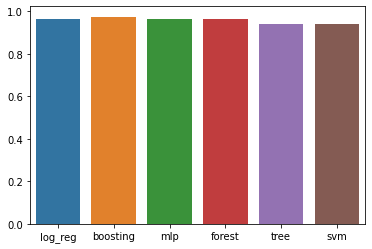

In [306]:
import seaborn as sns
sns.barplot(x=list(models.keys()), y=list(models.values()))

## **SELECTING MODEL:**
Every model seems to have a pretty good F1 score and vary only by 1% max.So I am going to use Logistic Regression for predicting the test set as it much faster compared to other models.

**FINAL MODEL: LOGISTIC REGRESSION**

In [304]:
#predicting the test set
Y_pred = log_reg.predict(test_x)

#accuracy on validation set
print("accuray on validation set",accuracy_score(test_y,Y_pred),"\n")

#precision on validation set
print("precision on validation set",precision_score(test_y,Y_pred),"\n")

#recall on validation set
print("recall on validation set",recall_score(test_y,Y_pred),"\n")

#F1 score on validation set
print("F1 score of validation set",f1_score(test_y,Y_pred),"\n")

accuray on validation set 0.9294117647058824 

precision on validation set 0.9375 

recall on validation set 0.9375 

F1 score of validation set 0.9375 

